<a href="https://colab.research.google.com/github/TarunDeshmukhh/Insurance_claim/blob/main/insuranceclaim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#upload the file
#from google.colab import files
#files.upload()

In [ ]:
#call libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
#store the dataset in the variable
df=pd.read_csv('data.csv')

In [ ]:
df.shape

(50553, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Gender                14600 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [ ]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [ ]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [ ]:
#check null values percentage
(df.isnull().sum()/df.shape[0])*100

ID                       0.000000
Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.119419
Age                      0.000000
dtype: float64

In [ ]:
#Null values in Gender are too much then delete this column
df=df.drop('Gender',axis=1)

In [ ]:
df.isnull().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

In [ ]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,29


In [ ]:
df.Claim.value_counts()

0    49812
1      741
Name: Claim, dtype: int64

In [ ]:
#separate categorical and numerical data
catdf=df.select_dtypes('object')
numdf=df.select_dtypes(['float64','int64'])

In [ ]:
#Do label encoding to categorical data
for i in catdf:
  le=LabelEncoder()
  catdf[i]=le.fit_transform(catdf[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#concat the data
newdf=pd.concat([catdf,numdf],axis=1)

In [ ]:
newdf.shape

(50553, 11)

In [ ]:
newdf.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination,ID,Claim,Duration,Net Sales,Commision (in value),Age
0,6,1,1,16,56,3433,0,7,0.0,17.82,31
1,7,1,1,10,79,4339,0,85,69.0,0.00,36
2,6,1,1,16,56,34590,0,11,19.8,11.88,75
3,7,1,1,1,38,55816,0,16,20.0,0.00,32
4,7,1,1,10,47,13816,0,10,15.0,0.00,29


In [ ]:
#separate input and ouput data
X=newdf.drop('Claim',axis=1)
Y=newdf['Claim']

In [ ]:
#DO standard scaling to input data
for i in X:
  ss=StandardScaler()
  X[i]=ss.fit_transform(X[[i]])

In [ ]:
#split the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
#create neural network
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(3, activation='relu',input_shape=(X.shape[1],)),
                           tf.keras.layers.Dense(3, activation='relu'),
                           tf.keras.layers.Dense(3, activation='relu'),
                           tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 33        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',loss='binary_crossentropy')

In [ ]:
trainedmodel=model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
1106/1106 [==============================] - 1s 955us/step - loss: 0.1344
Epoch 2/50
1106/1106 [==============================] - 1s 989us/step - loss: 0.0790
Epoch 3/50
1106/1106 [==============================] - 1s 957us/step - loss: 0.0757
Epoch 4/50
1106/1106 [==============================] - 1s 911us/step - loss: 0.0742
Epoch 5/50
1106/1106 [==============================] - 1s 863us/step - loss: 0.0732
Epoch 6/50
1106/1106 [==============================] - 1s 901us/step - loss: 0.0724
Epoch 7/50
1106/1106 [==============================] - 1s 890us/step - loss: 0.0718
Epoch 8/50
1106/1106 [==============================] - 1s 911us/step - loss: 0.0714
Epoch 9/50
1106/1106 [==============================] - 1s 890us/step - loss: 0.0710
Epoch 10/50
1106/1106 [==============================] - 1s 911us/step - loss: 0.0708
Epoch 11/50
1106/1106 [==============================] - 1s 948us/step - loss: 0.0705
Epoch 12/50
1106/1106 [==============================] - 1s 900

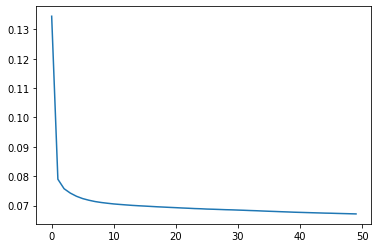

In [ ]:
plt.plot(trainedmodel.history['loss'])

In [ ]:
Y_predict=model.predict(X_test)

In [ ]:
Y_predict=np.where(Y_predict>=0.5,1,0)

In [ ]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14961
           1       0.00      0.00      0.00       205

    accuracy                           0.99     15166
   macro avg       0.49      0.50      0.50     15166
weighted avg       0.97      0.99      0.98     15166



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Data is imbalance 
Y.value_counts()

0    49812
1      741
Name: Claim, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
rus=RandomUnderSampler()
Xtrainss,Ytrainss=rus.fit_sample(X_train,Y_train)
Xtestss,Ytestss=rus.fit_sample(X_test,Y_test)
X_trainnew,Y_trainnew,X_testnew,Y_testnew=Xtrainss,Ytrainss,Xtestss,Ytestss

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(Y_trainnew).value_counts()

1    536
0    536
dtype: int64

In [ ]:
#create neural network
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(3, activation='relu',input_shape=(X.shape[1],)),
                           tf.keras.layers.Dense(3, activation='relu'),
                           tf.keras.layers.Dense(3, activation='relu'),
                           tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 33        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',loss='binary_crossentropy')

In [ ]:
trainedmodel=model.fit(X_trainnew,Y_trainnew,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 910us/step - loss: 0.7087
Epoch 2/100
34/34 [==============================] - 0s 947us/step - loss: 0.6904
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 0.6860
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 0.6845
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 0.6830
Epoch 6/100
34/34 [==============================] - 0s 932us/step - loss: 0.6816
Epoch 7/100
34/34 [==============================] - 0s 986us/step - loss: 0.6802
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 0.6788
Epoch 9/100
34/34 [==============================] - 0s 969us/step - loss: 0.6773
Epoch 10/100
34/34 [==============================] - 0s 933us/step - loss: 0.6757
Epoch 11/100
34/34 [==============================] - 0s 1ms/step - loss: 0.6740
Epoch 12/100
34/34 [==============================] - 0s 907us/step - loss: 0.6725
Epoch 13/100
34/34 [===

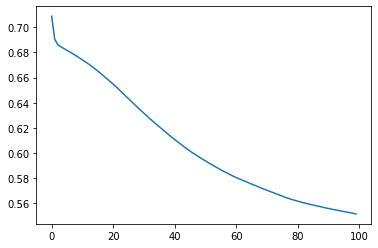

In [ ]:
plt.plot(trainedmodel.history['loss'])

In [ ]:
Y_predict=model.predict(X_test)
Y_predict=np.where(Y_predict>=0.5,1,0)

In [ ]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     14961
           1       0.05      0.62      0.09       205

    accuracy                           0.84     15166
   macro avg       0.52      0.73      0.50     15166
weighted avg       0.98      0.84      0.90     15166

